In [1]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cc_approvals.data.txt to cc_approvals.data.txt


In [6]:
import io
cc_apps = pd.read_csv(io.BytesIO(uploaded['crx.data']),header=None)

In [7]:
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [8]:
cc_apps.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [9]:
cc_apps.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [10]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [11]:
for x in cc_apps.columns:
  print(x, cc_apps[x].unique())
  ## we have got ? so replace it with nan and fillna

0 ['b' 'a' '?']
1 ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.

In [12]:
import numpy as np
# Replace the '?'s with NaN
cc_apps = cc_apps.replace('?', np.nan)

In [13]:
cc_apps.isnull().sum()
#0,3,4,5,6-->categorical
#1,13-->numerical

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [14]:
cc_apps.fillna(cc_apps.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
print('Total NaN: ' + str(cc_apps.isnull().values.sum()))

Total NaN: 67


In [15]:
for col in cc_apps:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

In [16]:
print('Total missing values:' + str(cc_apps.isnull().values.sum()))

Total missing values:0


-    383
+    307
Name: 15, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


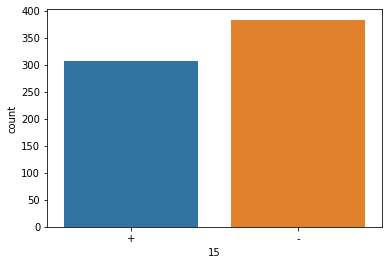

In [17]:
print(cc_apps[15].value_counts())
import seaborn as sns
sns.countplot(cc_apps[15])

## Label Encoders only for target variables with categorical features

when used on independent categorical features, numbers are assigned in alphabetical order so values with larger values get biased by the model

In [18]:
## only for target variables with categorical features
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in cc_apps:
    # Compare if the dtype is object
    if cc_apps[col].dtypes =='object':
    # Use LabelEncoder to do the numeric transformation
        le.fit(cc_apps[col])
        cc_apps[col]=le.transform(cc_apps[col])
#  information of the new dataframe
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    int64  
 1   1       690 non-null    int64  
 2   2       690 non-null    float64
 3   3       690 non-null    int64  
 4   4       690 non-null    int64  
 5   5       690 non-null    int64  
 6   6       690 non-null    int64  
 7   7       690 non-null    float64
 8   8       690 non-null    int64  
 9   9       690 non-null    int64  
 10  10      690 non-null    int64  
 11  11      690 non-null    int64  
 12  12      690 non-null    int64  
 13  13      690 non-null    int64  
 14  14      690 non-null    int64  
 15  15      690 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 86.4 KB


In [19]:
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,156,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,0,328,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,0,89,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,1,125,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,1,43,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


In [20]:
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop([11, 13], axis=1)
print(cc_apps.head())
cc_apps = cc_apps.values

# Segregate features and labels into separate variables
X,y = cc_apps[:,0:12] , cc_apps[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

   0    1      2   3   4   5   6     7   8   9   10  12   14  15
0   1  156  0.000   2   1  13   8  1.25   1   1   1   0    0   0
1   0  328  4.460   2   1  11   4  3.04   1   1   6   0  560   0
2   0   89  0.500   2   1  11   4  1.50   1   0   0   0  824   0
3   1  125  1.540   2   1  13   8  3.75   1   1   5   0    3   0
4   1   43  5.625   2   1  13   8  1.71   1   0   0   2    0   0


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print('Confusion matrix: \n ', confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.8377192982456141
Confusion matrix: 
  [[93 10]
 [27 98]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200,500]
penalty=['l2','l1','elasticnet', 'none']
C=np.logspace(-4, 4,20)
solver=["lbfgs", "newton-cg", "liblinear", "sag","saga"]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol= tol, max_iter= max_iter, penalty=penalty, C=C, solver=solver)

In [ ]:
grid_model = RandomizedSearchCV(estimator=logreg,param_distributions=param_grid, cv=5, verbose=1, n_jobs=-1)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y) ## on whole dataset

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best: 0.849275 using {'tol': 0.0001, 'solver': 'sag', 'penalty': 'none', 'max_iter': 200, 'C': 206.913808111479}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [ ]:
final_model=grid_model_result.best_estimator_

In [ ]:
final_model.fit(rescaledX_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


LogisticRegression(C=206.913808111479, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=None, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [ ]:
y_pred_final = final_model.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", final_model.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print('Confusion matrix: \n ', confusion_matrix(y_test, y_pred_final))

Accuracy of logistic regression classifier:  0.8464912280701754
Confusion matrix: 
  [[94  9]
 [26 99]]


In [ ]:
cc_apps.head()
## curse of dimensionality, on one hot encodingS

,2,7,10,14,15,0_b,1_15.17,1_15.75,1_15.83,1_15.92,1_16.00,1_16.08,1_16.17,1_16.25,1_16.33,1_16.50,1_16.92,1_17.08,1_17.25,1_17.33,1_17.42,1_17.50,1_17.58,1_17.67,1_17.83,1_17.92,1_18.00,1_18.08,1_18.17,1_18.25,1_18.33,1_18.42,1_18.50,1_18.58,1_18.67,1_18.75,1_18.83,1_18.92,1_19.00,1_19.17,...,13_00410,13_00411,13_00416,13_00420,13_00422,13_00431,13_00432,13_00434,13_00440,13_00443,13_00450,13_00454,13_00455,13_00460,13_00465,13_00470,13_00480,13_00487,13_00491,13_00500,13_00510,13_00515,13_00519,13_00520,13_00523,13_00550,13_00560,13_00583,13_00600,13_00640,13_00680,13_00711,13_00720,13_00760,13_00840,13_00928,13_00980,13_01160,13_02000,13_b
0,0.000,1.25,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.460,3.04,6,560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.500,1.50,0,824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.540,3.75,5,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.625,1.71,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(rescaledX_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
nb_pred=nb.predict(rescaledX_test)

In [26]:
# Get the accuracy score of logreg model and print it
print("Accuracy of NB classifier: ", nb.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print('Confusion matrix: \n ', confusion_matrix(y_test, nb_pred))

Accuracy of NB classifier:  0.8245614035087719
Confusion matrix: 
  [[ 83  20]
 [ 20 105]]


#Stochastic Gradient Descent

In [28]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss="modified_huber",shuffle=True,random_state=101)
sgd.fit(rescaledX_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
sgd_pred=nb.predict(rescaledX_test)

In [33]:
# Get the accuracy score of logreg model and print it
print("Accuracy of  SGDclassifier: ", sgd.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print('Confusion matrix: \n ', confusion_matrix(y_test, sgd_pred))

Accuracy of  SGDclassifier:  0.8421052631578947
Confusion matrix: 
  [[ 83  20]
 [ 20 105]]


#K-Nearest Neighbours

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn.fit(rescaledX_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')

In [61]:
knn_pred=knn.predict(rescaledX_test)

In [71]:
# Get the accuracy score of logreg model and print it
print("Accuracy of  KNN classifier: ", knn.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print('Confusion matrix: \n ', confusion_matrix(y_test, knn_pred))

Accuracy of  KNN classifier:  0.8728070175438597
Confusion matrix: 
  [[ 94   9]
 [ 20 105]]


In [66]:
from sklearn.metrics import classification_report, accuracy_score

In [67]:
acc=accuracy_score(y_test, knn_pred)
print("Accuracy Score", acc)
cr=classification_report(y_test, knn_pred)
print("Classification Report", cr)

Accuracy Score 0.8728070175438597
Classification Report               precision    recall  f1-score   support

         0.0       0.82      0.91      0.87       103
         1.0       0.92      0.84      0.88       125

    accuracy                           0.87       228
   macro avg       0.87      0.88      0.87       228
weighted avg       0.88      0.87      0.87       228



XGBoost CLassifier

In [68]:
import xgboost as xgb
xg=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xg.fit(rescaledX_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
xg_pred=xg.predict(rescaledX_test)

In [72]:
print("Accuracy of  SGDclassifier: ", xg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print('Confusion matrix: \n ', confusion_matrix(y_test, xg_pred))

Accuracy of  SGDclassifier:  0.8508771929824561
Confusion matrix: 
  [[ 94   9]
 [ 25 100]]


## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200, criterion="entropy")
rf.fit(rescaledX_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
rf_pred=rf.predict(rescaledX_test)

In [75]:
print("Accuracy of   Random Forest classifier: ", rf.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print('Confusion matrix: \n ', confusion_matrix(y_test, rf_pred))

Accuracy of   Random Forest classifier:  0.868421052631579
Confusion matrix: 
  [[ 92  11]
 [ 19 106]]


In [76]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [77]:
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=1,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(rescaledX_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [80]:
rf_randomcv.best_score_,rf_randomcv.best_params_

(0.8744588744588745,
 {'criterion': 'entropy',
  'max_depth': 1000,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 200})